In [1]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ps.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


# Data Cleaning

In [5]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
df.dropna(axis = 0,inplace=True)

In [7]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

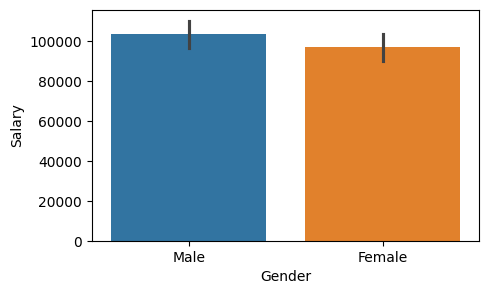

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x = df['Gender'],
            y = df['Salary'],
            hue = df['Gender'],
            )
plt.show()

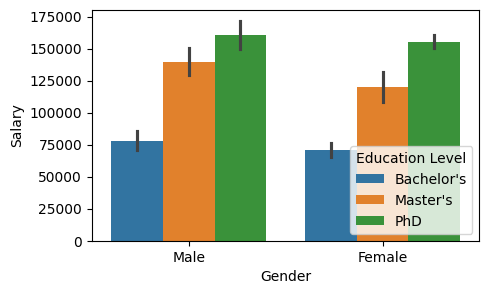

In [12]:
plt.figure(figsize=(5,3))
sns.barplot(x = df['Gender'],
            y = df['Salary'],
            hue = df["Education Level"],
            )
plt.show()

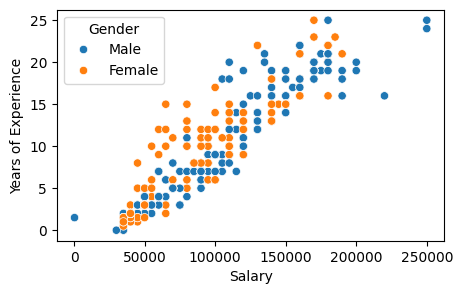

In [15]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df['Salary'],
            y = df['Years of Experience'],
            hue = df['Gender']           )
plt.show()

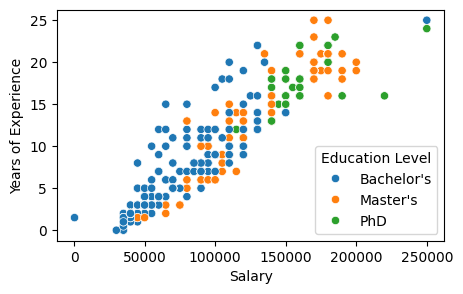

In [16]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = df['Salary'],
            y = df['Years of Experience'],
            hue = df['Education Level']           )
plt.show()

In [18]:
# Feature encoding

df.select_dtypes(include='object').columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
Lab_enc = LabelEncoder()
cat_col = ['Gender', 'Education Level', 'Job Title']
for i in df[cat_col]:
    df[i] = Lab_enc.fit_transform(df[i])

In [20]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [21]:
X = df.drop("Salary",axis = 1)
y = df['Salary']

In [27]:
#X

In [26]:
#y

In [ ]:
# Split into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [35]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience
242,38.0,0,0,141,10.0
82,25.0,1,0,106,0.0
317,36.0,1,0,135,8.0
294,45.0,0,1,122,14.0
107,36.0,1,0,45,7.0
...,...,...,...,...,...
90,36.0,1,2,91,11.0
169,34.0,1,1,153,9.0
335,47.0,1,1,30,19.0
53,47.0,1,1,171,19.0


In [36]:
X_train.shape

(261, 5)

In [37]:
y_train

242    120000.0
82      30000.0
317     95000.0
294    140000.0
107     60000.0
         ...   
90     120000.0
169    105000.0
335    170000.0
53     200000.0
222    100000.0
Name: Salary, Length: 261, dtype: float64

In [38]:
X_test

,Age,Gender,Education Level,Job Title,Years of Experience
38,26.0,0,0,16,1.0
230,30.0,1,0,65,3.0
208,47.0,1,1,25,20.0
346,35.0,0,0,131,8.0
210,38.0,1,1,127,9.0
...,...,...,...,...,...
62,40.0,0,0,40,12.0
76,50.0,0,0,89,22.0
109,28.0,1,0,15,2.0
88,46.0,1,1,144,21.0


In [28]:
# Model building
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = LinReg.predict(X_test)
y_pred[:10]

array([ 26889.13446436,  54456.04906633, 169805.13311174,  76687.88334537,
       110017.57667479,  92709.75291272,  46739.28641964,  53831.24514651,
       164681.53537433, 168359.31936216])

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.895665265383299

# new prediction

In [33]:
arr = np.array([[32.0,	1,	0,	159,	5.0]])
pred = LinReg.predict(arr)
pred

array([68957.33950742])

In [34]:
arr = np.array([[32.0,	"Fmale","Phd","information technology",	5.0]])
pred = LinReg.predict(arr)
pred

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('auto-mpg.data',delim_whitespace=True)

C:\Users\GrowTech\AppData\Local\Temp\ipykernel_14976\1206331499.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('auto-mpg.data',delim_whitespace=True)


In [19]:
df

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
